## Section 1: Data Preprocessing

note to self: running on python 3.9.1

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # to standardize the data to be of similar magnitude
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the dataset
raw_data = pd.read_csv('hospital_readmissions.csv')
raw_data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
# Make a copy of the raw dataset the original remains untouched
data = raw_data.copy()

In [4]:
# Check for missing values
missing_values_count = data.isnull().sum()
missing_values_count

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [5]:
# Convert yes/no values to binary

# 'change'
data['change'] = data['change'].map({'yes':1,'no':0})

# 'diabetes_med'
data['diabetes_med'] = data['diabetes_med'].map({'yes':1,'no':0})

# 'readmitted'
data['readmitted'] = data['readmitted'].map({'yes':1,'no':0})

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,0,0,1
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,1,1,1
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,0,0,1
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,1,1,0


Create a dummy variable for `glucose_test`

In [6]:
# Assessing the types of values for glucose_test
data.glucose_test.unique()

array(['no', 'normal', 'high'], dtype=object)

In [7]:
# Using one-hot encoding
dummy_glucose_test = pd.get_dummies(data['glucose_test'], prefix='glucose')

# Concatenating the dummy variables to the existing dataframe
data = pd.concat([data,dummy_glucose_test],axis=1)

# Deleting the 'glucose_test' column
data = data.drop('glucose_test',axis=1)

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,A1Ctest,change,diabetes_med,readmitted,glucose_high,glucose_no,glucose_normal
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,0,1,0,False,True,False
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,0,1,0,False,True,False
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,1,1,1,False,True,False
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,1,1,1,False,True,False
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,0,1,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,normal,0,0,1,False,True,False
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,high,1,1,1,False,True,False
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,no,0,0,1,False,False,True
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,1,1,0,False,True,False


Create a dummy variable for `A1Ctest`

In [8]:
# Assessing the types of values for 'A1Ctest'
data.A1Ctest.unique()

array(['no', 'normal', 'high'], dtype=object)

In [9]:
# Using one-hot encoding
dummy_A1Ctest = pd.get_dummies(data['A1Ctest'], prefix='A1Ctest')

# Concatenating the dummy variables to the existing dataframe
data = pd.concat([data,dummy_A1Ctest],axis=1)

# Deleting the 'A1Ctest' column
data = data.drop('A1Ctest',axis=1)

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,diag_3,change,diabetes_med,readmitted,glucose_high,glucose_no,glucose_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,...,Other,0,1,0,False,True,False,False,True,False
1,[70-80),3,34,2,13,0,0,0,Other,Other,...,Other,0,1,0,False,True,False,False,True,False
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,...,Circulatory,1,1,1,False,True,False,False,True,False
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,...,Diabetes,1,1,1,False,True,False,False,True,False
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,...,Respiratory,0,1,0,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,...,Circulatory,0,0,1,False,True,False,False,False,True
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,...,Other,1,1,1,False,True,False,True,False,False
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,...,Other,0,0,1,False,False,True,False,True,False
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,...,Other,1,1,0,False,True,False,False,True,False


Convert the age values from a range to a number

In [10]:
# Assessing the types of values for 'age'
data.age.unique()

array(['[70-80)', '[50-60)', '[60-70)', '[40-50)', '[80-90)', '[90-100)'],
      dtype=object)

In [11]:
# Creating a dictionary mapping the ranges to the average number in the range
age_mapping = {'[40-50)': 45,
               '[70-80)': 75,
               '[50-60)': 55,
               '[60-70)': 65,
               '[80-90)': 85,
               '[90-100)': 95
}

# Mapping the age ranges to numbers
data['age'] = data['age'].map(age_mapping)

# Converting the 'age' column to a numeric datatype from series
data['age'] = pd.to_numeric(data['age'])

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,diag_3,change,diabetes_med,readmitted,glucose_high,glucose_no,glucose_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal
0,75,8,72,1,18,2,0,0,Missing,Circulatory,...,Other,0,1,0,False,True,False,False,True,False
1,75,3,34,2,13,0,0,0,Other,Other,...,Other,0,1,0,False,True,False,False,True,False
2,55,5,45,0,18,0,0,0,Missing,Circulatory,...,Circulatory,1,1,1,False,True,False,False,True,False
3,75,2,36,0,12,1,0,0,Missing,Circulatory,...,Diabetes,1,1,1,False,True,False,False,True,False
4,65,1,42,0,7,0,0,0,InternalMedicine,Other,...,Respiratory,0,1,0,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,14,77,1,30,0,0,0,Missing,Circulatory,...,Circulatory,0,0,1,False,True,False,False,False,True
24996,85,2,66,0,24,0,0,0,Missing,Digestive,...,Other,1,1,1,False,True,False,True,False,False
24997,75,5,12,0,6,0,1,0,Missing,Other,...,Other,0,0,1,False,False,True,False,True,False
24998,75,2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,...,Other,1,1,0,False,True,False,False,True,False


Convert `medical_specialty` categories into numerical values

In [12]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to 'medical_specialty'
label_encoder.fit(data['medical_specialty'])

# Transform 'medical_specialty' using label encoding
data['medical_specialty_encoded'] = label_encoder.transform(data['medical_specialty'])

# Decode the encoded values to get the original medical specialty categories
original_categories = label_encoder.inverse_transform(data['medical_specialty_encoded'])

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,change,diabetes_med,readmitted,glucose_high,glucose_no,glucose_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal,medical_specialty_encoded
0,75,8,72,1,18,2,0,0,Missing,Circulatory,...,0,1,0,False,True,False,False,True,False,4
1,75,3,34,2,13,0,0,0,Other,Other,...,0,1,0,False,True,False,False,True,False,5
2,55,5,45,0,18,0,0,0,Missing,Circulatory,...,1,1,1,False,True,False,False,True,False,4
3,75,2,36,0,12,1,0,0,Missing,Circulatory,...,1,1,1,False,True,False,False,True,False,4
4,65,1,42,0,7,0,0,0,InternalMedicine,Other,...,0,1,0,False,True,False,False,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,14,77,1,30,0,0,0,Missing,Circulatory,...,0,0,1,False,True,False,False,False,True,4
24996,85,2,66,0,24,0,0,0,Missing,Digestive,...,1,1,1,False,True,False,True,False,False,4
24997,75,5,12,0,6,0,1,0,Missing,Other,...,0,0,1,False,False,True,False,True,False,4
24998,75,2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,...,1,1,0,False,True,False,False,True,False,2


In [13]:
# Get the mapping of encoded values to original categories
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping of encoded values to original categories
for category, encoded_value in mapping.items():
    print(f"Encoded Value: {encoded_value} -> Medical Specialty: {category}")

Encoded Value: 0 -> Medical Specialty: Cardiology
Encoded Value: 1 -> Medical Specialty: Emergency/Trauma
Encoded Value: 2 -> Medical Specialty: Family/GeneralPractice
Encoded Value: 3 -> Medical Specialty: InternalMedicine
Encoded Value: 4 -> Medical Specialty: Missing
Encoded Value: 5 -> Medical Specialty: Other
Encoded Value: 6 -> Medical Specialty: Surgery


Convert `diag_1`, `diag_2`, `diag_3` categories into numerical values

In [14]:
# Remove the original 'medical_specialty' column

data = data.drop(['medical_specialty'],axis=1)

In [15]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to 'medical_specialty'
label_encoder.fit(data['diag_1'])

# Transform 'medical_specialty' using label encoding
data['diag_1_encoded'] = label_encoder.transform(data['diag_1'])

# Decode the encoded values to get the original medical specialty categories
original_categories = label_encoder.inverse_transform(data['diag_1_encoded'])

In [16]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to 'medical_specialty'
label_encoder.fit(data['diag_2'])

# Transform 'medical_specialty' using label encoding
data['diag_2_encoded'] = label_encoder.transform(data['diag_2'])

# Decode the encoded values to get the original medical specialty categories
original_categories = label_encoder.inverse_transform(data['diag_2_encoded'])

In [17]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to 'medical_specialty'
label_encoder.fit(data['diag_3'])

# Transform 'medical_specialty' using label encoding
data['diag_3_encoded'] = label_encoder.transform(data['diag_3'])

# Decode the encoded values to get the original medical specialty categories
original_categories = label_encoder.inverse_transform(data['diag_3_encoded'])

data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,diag_1,diag_2,...,glucose_high,glucose_no,glucose_normal,A1Ctest_high,A1Ctest_no,A1Ctest_normal,medical_specialty_encoded,diag_1_encoded,diag_2_encoded,diag_3_encoded
0,75,8,72,1,18,2,0,0,Circulatory,Respiratory,...,False,True,False,False,True,False,4,0,7,6
1,75,3,34,2,13,0,0,0,Other,Other,...,False,True,False,False,True,False,5,6,6,6
2,55,5,45,0,18,0,0,0,Circulatory,Circulatory,...,False,True,False,False,True,False,4,0,0,0
3,75,2,36,0,12,1,0,0,Circulatory,Other,...,False,True,False,False,True,False,4,0,6,1
4,65,1,42,0,7,0,0,0,Other,Circulatory,...,False,True,False,False,True,False,3,6,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,14,77,1,30,0,0,0,Circulatory,Other,...,False,True,False,False,False,True,4,0,6,0
24996,85,2,66,0,24,0,0,0,Digestive,Injury,...,False,True,False,True,False,False,4,2,3,6
24997,75,5,12,0,6,0,1,0,Other,Other,...,False,False,True,False,True,False,4,6,6,6
24998,75,2,61,3,15,0,0,0,Respiratory,Diabetes,...,False,True,False,False,True,False,2,7,1,6


In [18]:
# Get the mapping of encoded values to original categories
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping of encoded values to original categories
for category, encoded_value in mapping.items():
    print(f"Encoded Value: {encoded_value} -> Diagnosis: {category}")

Encoded Value: 0 -> Diagnosis: Circulatory
Encoded Value: 1 -> Diagnosis: Diabetes
Encoded Value: 2 -> Diagnosis: Digestive
Encoded Value: 3 -> Diagnosis: Injury
Encoded Value: 4 -> Diagnosis: Missing
Encoded Value: 5 -> Diagnosis: Musculoskeletal
Encoded Value: 6 -> Diagnosis: Other
Encoded Value: 7 -> Diagnosis: Respiratory


In [19]:
# Remove the original columns
data = data.drop(['diag_1','diag_2','diag_3'],axis=1)
print(data.columns)

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'change',
       'diabetes_med', 'readmitted', 'glucose_high', 'glucose_no',
       'glucose_normal', 'A1Ctest_high', 'A1Ctest_no', 'A1Ctest_normal',
       'medical_specialty_encoded', 'diag_1_encoded', 'diag_2_encoded',
       'diag_3_encoded'],
      dtype='object')


Reorganize column header positions

In [20]:
# Putting columns back in original order with new dummy and encoded variables
reordered = ['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
        'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
        'medical_specialty_encoded', 'diag_1_encoded', 'diag_2_encoded', 'diag_3_encoded',
        'glucose_no', 'glucose_normal','glucose_high', 'A1Ctest_no', 'A1Ctest_normal',
        'A1Ctest_high', 'change', 'diabetes_med', 'readmitted']

Save preprocessed data in a checkpoint

In [21]:
# Save into new checkpoint
data_reordered = data.reindex(columns=reordered)
data_reordered.copy()
data_reordered

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_encoded,diag_1_encoded,...,diag_3_encoded,glucose_no,glucose_normal,glucose_high,A1Ctest_no,A1Ctest_normal,A1Ctest_high,change,diabetes_med,readmitted
0,75,8,72,1,18,2,0,0,4,0,...,6,True,False,False,True,False,False,0,1,0
1,75,3,34,2,13,0,0,0,5,6,...,6,True,False,False,True,False,False,0,1,0
2,55,5,45,0,18,0,0,0,4,0,...,0,True,False,False,True,False,False,1,1,1
3,75,2,36,0,12,1,0,0,4,0,...,1,True,False,False,True,False,False,1,1,1
4,65,1,42,0,7,0,0,0,3,6,...,7,True,False,False,True,False,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,14,77,1,30,0,0,0,4,0,...,0,True,False,False,False,True,False,0,0,1
24996,85,2,66,0,24,0,0,0,4,2,...,6,True,False,False,False,False,True,1,1,1
24997,75,5,12,0,6,0,1,0,4,6,...,6,False,True,False,True,False,False,0,0,1
24998,75,2,61,3,15,0,0,0,2,7,...,6,True,False,False,True,False,False,1,1,0


Checking the datatypes of all variables

In [22]:
# All datatypes are integers, which is what we want to we can create analyses later

print(type(data_reordered['age'][0]))
print(type(data_reordered['time_in_hospital'][0]))
print(type(data_reordered['n_lab_procedures'][0]))
print(type(data_reordered['n_procedures'][0]))
print(type(data_reordered['n_medications'][0]))
print(type(data_reordered['n_outpatient'][0]))
print(type(data_reordered['n_inpatient'][0]))
print(type(data_reordered['n_emergency'][0]))
print(type(data_reordered['medical_specialty_encoded'][0]))
print(type(data_reordered['diag_1_encoded'][0]))
print(type(data_reordered['diag_2_encoded'][0]))
print(type(data_reordered['diag_3_encoded'][0]))
print(type(data_reordered['glucose_no'][0]))
print(type(data_reordered['glucose_normal'][0]))
print(type(data_reordered['glucose_high'][0]))
print(type(data_reordered['A1Ctest_no'][0]))
print(type(data_reordered['A1Ctest_normal'][0]))
print(type(data_reordered['A1Ctest_high'][0]))
print(type(data_reordered['change'][0]))
print(type(data_reordered['diabetes_med'][0]))
print(type(data_reordered['readmitted'][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


Saving current dataframe as a csv file

In [23]:
file_path = 'hospital_readmissions_preprocessed.csv'
data_reordered.to_csv(file_path, index=False)

## Section 2: Create a Logistic Regression to Predict Hospital Readmittance

Load in the preprocessed dataset

In [24]:
data_preprocessed = pd.read_csv('hospital_readmissions_preprocessed.csv')
data_preprocessed.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_encoded,diag_1_encoded,...,diag_3_encoded,glucose_no,glucose_normal,glucose_high,A1Ctest_no,A1Ctest_normal,A1Ctest_high,change,diabetes_med,readmitted
0,75,8,72,1,18,2,0,0,4,0,...,6,True,False,False,True,False,False,0,1,0
1,75,3,34,2,13,0,0,0,5,6,...,6,True,False,False,True,False,False,0,1,0
2,55,5,45,0,18,0,0,0,4,0,...,0,True,False,False,True,False,False,1,1,1
3,75,2,36,0,12,1,0,0,4,0,...,1,True,False,False,True,False,False,1,1,1
4,65,1,42,0,7,0,0,0,3,6,...,7,True,False,False,True,False,False,0,1,0


Create the targets

In [25]:
# Extract the 'readmitted' column as the target variable
targets = data['readmitted']

# Check if dataset is balanced (what % of targets are 1s)
# targets.sum() will give us the number of 1s that there are
# shape[0] will give us the length of the targets array
targets.sum() / targets.shape[0]

# This means that 47% of the patients have been readmitted

0.47016

Select inputs for the regression

In [26]:
data_preprocessed.shape

(25000, 21)

In [27]:
# Viewing the entire dataset except the target variable
data_preprocessed.iloc[:,:-1]

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_encoded,diag_1_encoded,diag_2_encoded,diag_3_encoded,glucose_no,glucose_normal,glucose_high,A1Ctest_no,A1Ctest_normal,A1Ctest_high,change,diabetes_med
0,75,8,72,1,18,2,0,0,4,0,7,6,True,False,False,True,False,False,0,1
1,75,3,34,2,13,0,0,0,5,6,6,6,True,False,False,True,False,False,0,1
2,55,5,45,0,18,0,0,0,4,0,0,0,True,False,False,True,False,False,1,1
3,75,2,36,0,12,1,0,0,4,0,6,1,True,False,False,True,False,False,1,1
4,65,1,42,0,7,0,0,0,3,6,0,7,True,False,False,True,False,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,85,14,77,1,30,0,0,0,4,0,6,0,True,False,False,False,True,False,0,0
24996,85,2,66,0,24,0,0,0,4,2,3,6,True,False,False,False,False,True,1,1
24997,75,5,12,0,6,0,1,0,4,6,6,6,False,True,False,True,False,False,0,0
24998,75,2,61,3,15,0,0,0,2,7,1,6,True,False,False,True,False,False,1,1


In [28]:
# Creating a variable that will contain the inputs (excluding the targets/'readmitted')
unscaled_inputs = data_preprocessed.iloc[:,:-1]

Standardize the data 

In [29]:
# Defining the scaler as an object
readmittance_scaler = StandardScaler()

In [30]:
class CustomScaler(BaseEstimator,TransformerMixin):

    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do

    def __init__(self,columns):

        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler()
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None


    # the fit method, which, again based on StandardScale

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):

        # record the initial order of the columns
        init_col_order = X.columns

        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)

        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]

        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [31]:
# Check the current columns in the dataset
unscaled_inputs.columns.values

array(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty_encoded', 'diag_1_encoded', 'diag_2_encoded',
       'diag_3_encoded', 'glucose_no', 'glucose_normal', 'glucose_high',
       'A1Ctest_no', 'A1Ctest_normal', 'A1Ctest_high', 'change',
       'diabetes_med'], dtype=object)

In [32]:
# Need to omit the columns with dummy variables, or else we would lose the interpretability of the dummy variables

columns_to_scale = ['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
                    'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency','change',
                    'diabetes_med']

In [33]:
readmittance_scaler = CustomScaler(columns_to_scale)

In [34]:
readmittance_scaler.fit(unscaled_inputs)

c:\Python39\lib\site-packages\numpy\core\fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


CustomScaler(columns=['age', 'time_in_hospital', 'n_lab_procedures',
                      'n_procedures', 'n_medications', 'n_outpatient',
                      'n_inpatient', 'n_emergency', 'change', 'diabetes_med'])

In [35]:
# Standardize the data using transform
scaled_inputs = readmittance_scaler.transform(unscaled_inputs)

scaled_inputs

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty_encoded,diag_1_encoded,diag_2_encoded,diag_3_encoded,glucose_no,glucose_normal,glucose_high,A1Ctest_no,A1Ctest_normal,A1Ctest_high,change,diabetes_med
0,0.498538,1.181671,1.451151,-0.205440,0.216814,1.366510,-0.522918,-0.210644,4,0,7,6,True,False,False,True,False,False,-0.923181,0.547893
1,0.498538,-0.484212,-0.466276,0.377601,-0.403505,-0.306494,-0.522918,-0.210644,5,6,6,6,True,False,False,True,False,False,-0.923181,0.547893
2,-1.021673,0.182141,0.088769,-0.788481,0.216814,-0.306494,-0.522918,-0.210644,4,0,0,0,True,False,False,True,False,False,1.083211,0.547893
3,0.498538,-0.817389,-0.365359,-0.788481,-0.527569,0.530008,-0.522918,-0.210644,4,0,6,1,True,False,False,True,False,False,1.083211,0.547893
4,-0.261568,-1.150566,-0.062607,-0.788481,-1.147888,-0.306494,-0.522918,-0.210644,3,6,0,7,True,False,False,True,False,False,-0.923181,0.547893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.258643,3.180732,1.703444,-0.205440,1.705579,-0.306494,-0.522918,-0.210644,4,0,6,0,True,False,False,False,True,False,-0.923181,-1.825172
24996,1.258643,-0.817389,1.148400,-0.788481,0.961196,-0.306494,-0.522918,-0.210644,4,2,3,6,True,False,False,False,False,True,1.083211,0.547893
24997,0.498538,0.182141,-1.576365,-0.788481,-1.271951,-0.306494,0.326030,-0.210644,4,6,6,6,False,True,False,True,False,False,-0.923181,-1.825172
24998,0.498538,-0.817389,0.896107,0.960642,-0.155377,-0.306494,-0.522918,-0.210644,2,7,1,6,True,False,False,True,False,False,1.083211,0.547893


In [36]:
# Checking the shape of the array to see if it's the same as the unscaled dataset excluding 'readmitted'
scaled_inputs.shape

(25000, 20)

## Section 3: Split the data into train & test, then shuffle

In [37]:
# Import library to train,test,split
from sklearn.model_selection import train_test_split

Split the data

In [38]:
# Checking how this method works
train_test_split(scaled_inputs, targets)

[            age  time_in_hospital  n_lab_procedures  n_procedures  \
 24694 -0.261568         -0.484212          0.542896     -0.788481   
 10942 -1.021673          2.847555          1.854820      0.377601   
 24955  0.498538          2.514378         -1.021321     -0.788481   
 8991   1.258643          0.848495          0.290603      0.960642   
 24096  1.258643         -1.150566         -0.163524     -0.788481   
 ...         ...               ...               ...           ...   
 23227 -1.021673         -0.817389          0.845648     -0.788481   
 16171  0.498538         -0.151036          1.047482     -0.788481   
 5167   0.498538         -0.151036          0.694272      0.377601   
 6709  -0.261568          2.847555          1.299775     -0.788481   
 14956  1.258643          0.515318          0.088769     -0.788481   
 
        n_medications  n_outpatient  n_inpatient  n_emergency  \
 24694      -0.527569     -0.306494    -0.522918    -0.210644   
 10942       1.829643     -0

In [39]:
# Declare 4 variables for the split
# Splitting the dataset so 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8,
                                                                            test_size = 0.2, random_state = 20)

In [40]:
# Check the shape of the train inputs and targets
print(x_train.shape, y_train.shape)

(20000, 20) (20000,)


In [41]:
# Check the shape of the test inputs and targets
print(x_test.shape, y_test.shape)

(5000, 20) (5000,)


## Section 4: Logistic Regression

In [42]:
# Create a logistic regression object
reg = LogisticRegression()

In [43]:
# Fit the train inputs
reg.fit(x_train,y_train)

LogisticRegression()

In [44]:
# Assess the train accuracy of the model
reg.score(x_train,y_train)

0.6108

In [45]:
# Manually assessing the train accuracy
# Find the model outputs according to our model
model_outputs = reg.predict(x_train)
model_outputs

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [46]:
# Compare them with the targets
model_outputs == y_train

3572      True
6634      True
6745      True
4567     False
19552    False
         ...  
14729     True
23452     True
23775     True
4367     False
15715     True
Name: readmitted, Length: 20000, dtype: bool

In [47]:
# Find out in how many instances we predicted correctly
np.sum((model_outputs==y_train))

12216

In [48]:
# Get the total number of instances
model_outputs.shape[0]

20000

In [49]:
# Calculate the accuracy of the model
# Same as when we used reg.score
np.sum((model_outputs==y_train)) / model_outputs.shape[0]

0.6108

Find the intercept and coefficients

In [50]:
# Get the intercept (bias) of our model
reg.intercept_

array([0.09135714])

In [51]:
# Get the coefficients (weights) of our model
reg.coef_

array([[ 0.05734576,  0.04390673,  0.0461394 , -0.09012486,  0.01439352,
         0.16187974,  0.44726618,  0.17685556, -0.02868277, -0.02365755,
        -0.00788447, -0.01258364, -0.03725775,  0.02994741,  0.09701489,
         0.10100336, -0.06253156,  0.05123274,  0.02887867,  0.10084249]])

In [52]:
# Save the names of the columns in an ad-hoc variable
feature_name = unscaled_inputs.columns.values

In [53]:
# Create a summary table
summary_table = pd.DataFrame(columns=['Feature name'],data = feature_name)

# Add the coefficient values to the table
summary_table['Coefficient'] = np.transpose(reg.coef_)

# Move all indices by 1
summary_table.index = summary_table.index + 1

# Move 'intercept' to the top
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# Sort the dataframe by index
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,0.091357
1,age,0.057346
2,time_in_hospital,0.043907
3,n_lab_procedures,0.046139
4,n_procedures,-0.090125
5,n_medications,0.014394
6,n_outpatient,0.161880
7,n_inpatient,0.447266
8,n_emergency,0.176856
9,medical_specialty_encoded,-0.028683


Intepretation of the coefficients


c:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

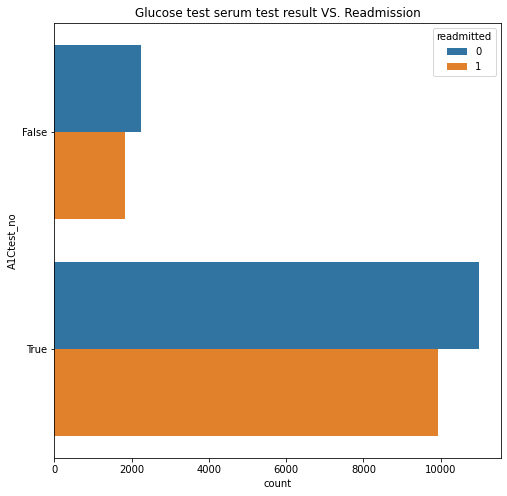

In [54]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = data_preprocessed['A1Ctest_no'], hue = data_preprocessed['readmitted']).set_title('Glucose test serum test result VS. Readmission')

In [55]:
# Create a Series called 'odds_ratio' which will show the odds ratio
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,0.091357,1.095660
1,age,0.057346,1.059022
2,time_in_hospital,0.043907,1.044885
3,n_lab_procedures,0.046139,1.047220
4,n_procedures,-0.090125,0.913817
5,n_medications,0.014394,1.014498
6,n_outpatient,0.161880,1.175719
7,n_inpatient,0.447266,1.564031
8,n_emergency,0.176856,1.193459
9,medical_specialty_encoded,-0.028683,0.971725


In [56]:
# Sort the table from greatest odds ratio
sorted_table = summary_table.sort_values(by='Odds_ratio', ascending=False)

sorted_table

,Feature name,Coefficient,Odds_ratio
7,n_inpatient,0.447266,1.564031
8,n_emergency,0.176856,1.193459
6,n_outpatient,0.161880,1.175719
16,A1Ctest_no,0.101003,1.106280
20,diabetes_med,0.100842,1.106102
15,glucose_high,0.097015,1.101877
0,Intercept,0.091357,1.095660
1,age,0.057346,1.059022
18,A1Ctest_high,0.051233,1.052568
3,n_lab_procedures,0.046139,1.047220


In [57]:
print(type(data_preprocessed))


<class 'pandas.core.frame.DataFrame'>


In [66]:
from tensorflow.keras import layers


# Define a function that will scale the inputs
def scale(features, label):
    features = tf.cast(features, tf.float32)
    return features, label

# Create TensorFlow Dataset from pandas DataFrame
dataset = tf.data.Dataset.from_tensor_slices((data_preprocessed.drop('readmitted', axis=1).values, data_preprocessed['readmitted'].values))
scaled_train_data = dataset.map(scale)

# Split the data into training and validation sets
train_size = int(0.8 * len(data_preprocessed))
train_data = scaled_train_data.take(train_size)
validation_data = scaled_train_data.skip(train_size)

# Preprocess the data - shuffle and batch
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
validation_data = validation_data.batch(BATCH_SIZE)

# Define the model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(20,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
num_epochs = 10
model.fit(train_data, epochs=num_epochs, validation_data=validation_data)

# Evaluate the model on test data
num_test_samples = 25000
test_data = dataset.batch(num_test_samples)
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [59]:
# Calculate the number of validation samples
num_validation_samples = int(0.1 * len(data_preprocessed))
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

# Store the number of test samples
num_test_samples = 25000  # Replace with the actual number of test samples in your dataset
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [60]:
# Define a function that will scale the inputs
def scale(features, label):
    features = tf.cast(features, tf.float32)
    return features, label

# Create TensorFlow Dataset from pandas DataFrame
dataset = tf.data.Dataset.from_tensor_slices((data_preprocessed.drop('readmitted', axis=1).values, data_preprocessed['readmitted'].values))
scaled_train_and_validation_data = dataset.map(scale)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
# Preprocess the data - shuffle and batch
BUFFER_SIZE = 25000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

In [ ]:
# Using mini-batch gradient descent
BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = dataset.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

In [ ]:
input_size = 20
output_size = 1
hidden_layer_size = 50 # will increase as I do not want to overfit right away

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(20,)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='sigmoid')
                            ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.001, 0.01, 0.1], 'batch_size': [32, 64, 128]}
grid_search = GridSearchCV(model, param_grid, cv=3)

In [ ]:
# Setting the number of epochs
num_epochs = 8

# Fitting the model
model.fit(train_data, epochs = num_epochs, validation_data=(validation_inputs, validation_targets), verbose=2)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)

print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

# Test accuracy: 61.46%
# Test accuracy: 56.44% -> 59.04 -> 59.23 -> 61.42 -> 60.48(200) -> 61.09 (75) -> 54.65(25) -> 61.54 (50) | 61.73 (8)